In [206]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand

Definition of probability function (transition matrix analogue), Q


In [207]:
def Q(x,y,sigma=1.0):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-1/2/sigma**2*(y-x)**2)

Definition of invariant distribution, P

In [208]:
def P(x):
    return np.exp(-x**2/(2+np.sin(x)))

Definition of phi, here for simplicity it is just x itself, hence P(phi) should compute the mean of P

In [211]:
def phi(x):
    return x

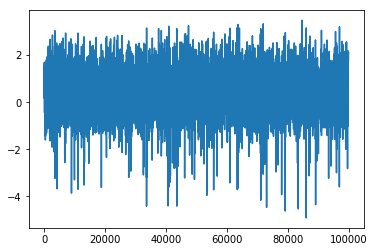

pi(phi) is 
0.3151297381856621


In [210]:
sigma = 5
iterations = 100000
x = np.random.rand() #starting point
mc = np.zeros((iterations,1)) #markov chain

#M-H algorithm
for i in range(iterations):
    
    mc[i] = x
    
    e = rand.gauss(0,sigma**2)
    x_test = x + e #generating new proposal
    
    #computing acceptance probability
    #since Q fulfils detailed balance, it cancels out in the computation, hence is left out here
    alpha = np.minimum(1,P(x_test/P(x)))
    

    if(rand.uniform(0,1) < alpha):
        x_new = x_test
    else:
        x_new = x

    x = x_new
    
plt.plot(range(iterations),mc)
plt.show()

#mean estimation
print('pi(phi) is ')
print(np.sum(phi(mc))/iterations)